<a href="https://colab.research.google.com/github/shahchayan9/Clustering/blob/main/Clustering_Document.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install Required Libraries
!pip install sentence-transformers -q
!pip install scikit-learn -q
!pip install matplotlib -q









In [ ]:
# Step 2: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer


In [ ]:
# Step 3: Define the Documents to Cluster
documents = [
    "Artificial intelligence is transforming the world.",
    "Machine learning algorithms are widely used in predictive modeling.",
    "Data science involves statistics, machine learning, and domain expertise.",
    "Climate change is one of the biggest challenges of our time.",
    "Global warming is causing sea levels to rise.",
    "Renewable energy sources are key to a sustainable future.",
    "Python is a versatile programming language for data science.",
    "JavaScript is essential for building interactive web applications.",
    "React and Angular are popular JavaScript frameworks.",
    "Natural language processing enables machines to understand human language."
]

In [ ]:
# Step 4: Load a Pretrained Model for Generating Embeddings
# Using SentenceTransformer from Hugging Face
model = SentenceTransformer('all-MiniLM-L6-v2')  # State-of-the-art lightweight embedding model


In [ ]:
# Step 5: Generate Embeddings for the Documents
embeddings = model.encode(documents)

# Step 6: Perform Clustering Using K-Means
num_clusters = 3  # Adjust this based on your data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

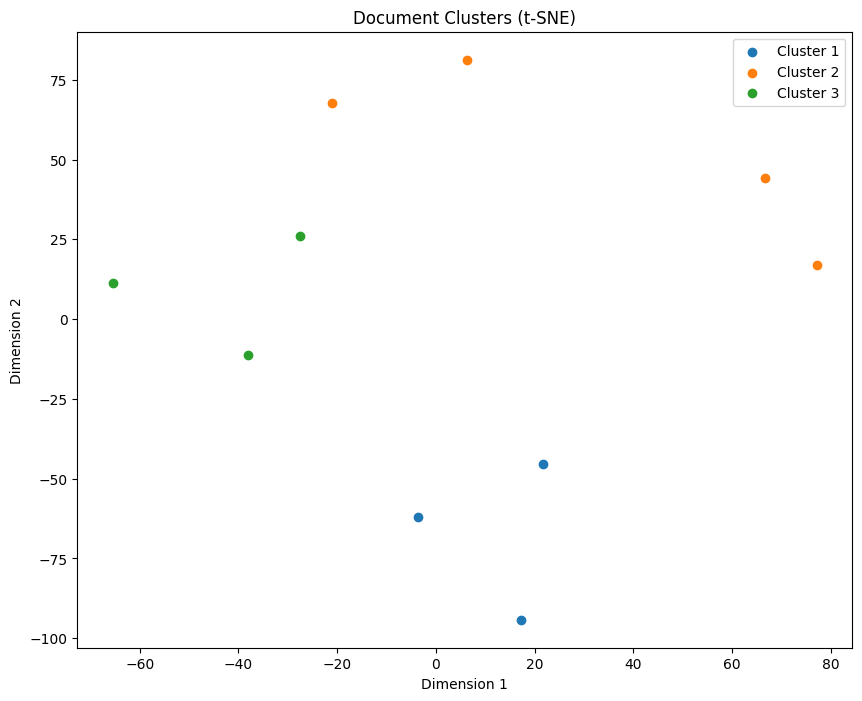


Cluster Assignments:

Cluster 1:
  - Climate change is one of the biggest challenges of our time.
  - Global warming is causing sea levels to rise.
  - Renewable energy sources are key to a sustainable future.

Cluster 2:
  - Data science involves statistics, machine learning, and domain expertise.
  - Python is a versatile programming language for data science.
  - JavaScript is essential for building interactive web applications.
  - React and Angular are popular JavaScript frameworks.

Cluster 3:
  - Artificial intelligence is transforming the world.
  - Machine learning algorithms are widely used in predictive modeling.
  - Natural language processing enables machines to understand human language.



In [ ]:
# Step 7: Visualize Clusters Using t-SNE
# Reduce dimensionality of embeddings for visualization
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster)
    plt.scatter(
        reduced_embeddings[cluster_indices, 0],
        reduced_embeddings[cluster_indices, 1],
        label=f"Cluster {cluster + 1}"
    )
plt.title("Document Clusters (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

# Step 8: Display Cluster Assignments
print("\nCluster Assignments:\n")
for cluster in range(num_clusters):
    print(f"Cluster {cluster + 1}:")
    for idx, doc in enumerate(documents):
        if cluster_labels[idx] == cluster:
            print(f"  - {doc}")
    print()
